 # **Cyclistic Case Study**

Prepared by: Sunny Polamuri

Prepared on: 2022–08–30

# **Introduction**
 
This case study is the final capstone project in the Google Data Analytics Professional Course offered by Coursera. Below, you will find an analysis and presentation of the data from Cyclistic which was performed with the help of R Studio for data preparation, processing, visualization and insights.

**Background**

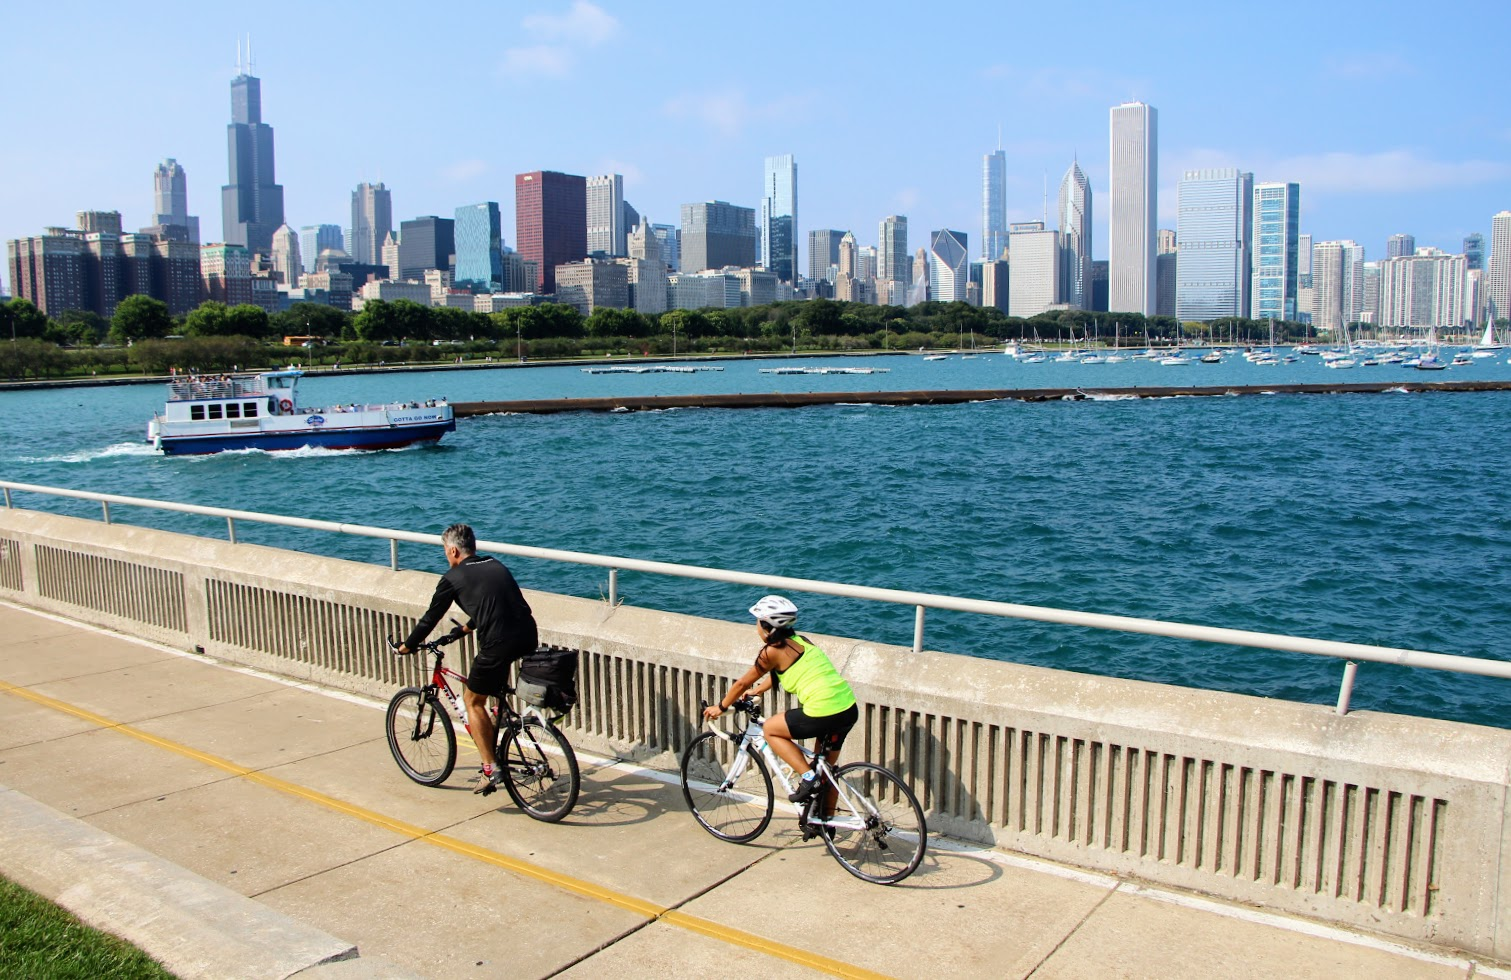

Chicago, a city that is definitely one of the top bike friendly cities, has a big history and engagement in the bike scene. Here, as a data analyst working for Cyclistic, (a fictional bike share company based in Chicago) I am in charge of the drive of our marketing team. Cyclistic is a bike-share program that launched in 2016, features a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can't use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

Cyclistic's marketing strategy relied more on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Then, install the packages and libraries that are needed for the project

Annual members are much more profitable than casual riders. So our main scope now here is how can we morph our marketing strategy in order to convert casual riders into annual members? With the question set in stone, I will use data from the past 12 months, August 2021 - July 2022. An analysis of that data will guide the direction of our marketing strategy and allow us to answer 3 big questions which are:

1. How do annual members and casual riders use Cyclistic bikes differently?

2. Why would casual riders buy Cyclistic annual memberships?

3. How can Cyclistic use digital media to influence casual riders to become members?


The first question was primarily assigned to us in this case, which is, how do annual members and casual riders use Cyclistic bikes differently?

We should take into account our main stakeholders. 

These are:

- The marketing team and my manager
- The executive team
- The Cyclistic users



**Data Sources**

This data is actual public data that has been made available by Motivate International Inc. who operates the City of Chicago's Divvy bicycle sharing service. Each data set is in csv format and details every ride logged by Cyclistic customers. All user's personal data has been scrubbed for privacy purposes. The data contains the following columns:

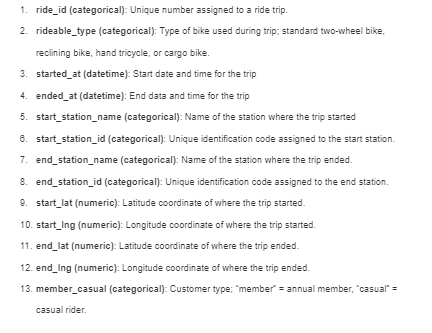

# **Data Documentation, Cleaning and Preparation**

Data cleaning, processing and analysis will mainly occur in R Studio instead of Excel or Google Sheets as I feel that there is too much data to process and a spreadsheet will not be ideal for this type of work.


**Data Preparation**

First, check your file directory with

In [ ]:
getwd()

In [ ]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("janitor")
install.packages("dplyr")
install.packages("ggplot2")

library(tidyverse)
library(lubridate)
library(janitor)
library(dplyr)
library(ggplot2)

Collect and import the data

In [ ]:
trip21_Aug <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202108-divvy-tripdata.csv")
trip21_Sep <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202109-divvy-tripdata.csv")
trip21_Oct <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202110-divvy-tripdata.csv")
trip21_Nov <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202111-divvy-tripdata.csv")
trip21_Dec <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202112-divvy-tripdata.csv")
trip22_Jan <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202201-divvy-tripdata.csv")
trip22_Feb <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202202-divvy-tripdata.csv")
trip22_Mar <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202203-divvy-tripdata.csv")
trip22_Apr <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project//202204-divvy-tripdata.csv")
trip22_May <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202205-divvy-tripdata.csv")
trip22_Jun <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202206-divvy-tripdata.csv")
trip22_Jul <- read.csv("C:/Users/17737/Dropbox/My PC (LAPTOP-H598T91R)/Documents/Google project/202207-divvy-tripdata.csv")

Compare the column names of each of the files as they all need to have the same name for them to be joined

In [ ]:
colnames(trip21_Aug)
colnames(trip21_Sep)
colnames(trip21_Oct)
colnames(trip21_Nov)
colnames(trip21_Dec)
colnames(trip22_Jan)
colnames(trip22_Feb)
colnames(trip22_Mar)
colnames(trip22_Apr)
colnames(trip22_May)
colnames(trip22_Jun)
colnames(trip22_Jul)

Since all the column names are identical, we can consolidate them for further analysis

In [ ]:
trips21_22<- rbind(trip21_Aug, trip21_Sep, trip21_Oct, trip21_Nov, trip21_Dec, trip22_Jan, trip22_Feb, trip22_Mar, trip22_Apr, trip22_May, trip22_Jun, trip22_Jul)

View our full data set

In [ ]:
View(trips21_22)


Check if the data structures are consistent


In [ ]:
str(trips21_22)


Remove unnecessary data fields that are not useful for our analysis


In [ ]:
trips21_22 <- trips21_22 %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))


Double checking my data just in case

In [ ]:
View(trips21_22)
colnames(trips21_22)  #List of column names
nrow(trips21_22)  #How many rows are in data frame?
dim(trips21_22)  #Dimensions of the data frame?
head(trips21_22, 6)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(trips21_22)  #See list of columns and data types (numeric, character, etc)
summary(trips21_22) #inspect the date and its dimensions before moving onto cleaning

Reassignments to better suit our data and needs

In [ ]:
trips21_22 <-  trips21_22 %>%  #rename
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

Recheck the data to make sure the proper number of observations were reassigned


In [ ]:
table(trips21_22$member_casual)


Add columns that list the date, month, day, and year of each ride. This will allow us to aggregate ride data for each month, day, or year

In [ ]:
trips21_22$date <- as.Date(trips21_22$started_at) #The default format is yyyy-mm-dd
trips21_22$month <- format(as.Date(trips21_22$date), "%m")
trips21_22$day <- format(as.Date(trips21_22$date), "%d")
trips21_22$year <- format(as.Date(trips21_22$date), "%Y")
trips21_22$day_of_week <- format(as.Date(trips21_22$date), "%A")


Insert a "ride_length" column, make the necessary calculations and conversions

In [ ]:
# Add a "ride_length" calculation for further analysis (in minutes)

trips21_22$ride_length <- (as.double(difftime(trips21_22$ended_at, trips21_22$started_at))) /60

# Convert "ride_length" from Factor to numeric so we can run calculations on the data

str(trips21_22)
trips21_22$ride_length <- as.numeric(as.character(trips21_22$ride_length))

Clean your data by removing blanks and double check your new column "ride_length"

In [ ]:
#Remove all bad data such as blanks

trips21_22 <- trips21_22[!(trips21_22$start_station_name == "HQ QR" | trips21_22$ride_length<0),]

#Verify the new column ride length and our dataset

summary(trips21_22$ride_length)
View(trips21_22)

**Analyze your data**

Calculate the mean, median, max, min to observe the spread of the data

In [ ]:
aggregate(trips21_22$ride_length ~ trips21_22$member_casual, FUN = mean)
aggregate(trips21_22$ride_length ~ trips21_22$member_casual, FUN = median)
aggregate(trips21_22$ride_length ~ trips21_22$member_casual, FUN = max)
aggregate(trips21_22$ride_length ~ trips21_22$member_casual, FUN = min)


See the average ride time by each day for members vs casual users

In [ ]:
aggregate(trips21_22$ride_length ~ trips21_22$member_casual + trips21_22$day_of_week, FUN = mean)

Notice that the days of the week are out of order. Let's fix that.

In [ ]:
trips21_22$day_of_week <- ordered(trips21_22$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Now, let's run the average ride time by each day for members vs casual users

In [ ]:
aggregate(trips21_22$ride_length ~ trips21_22$member_casual + trips21_22$day_of_week, FUN = mean)

Analyze ridership data by type and weekday

In [ ]:
trips21_22 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)		# sorts

# Data Visualizations

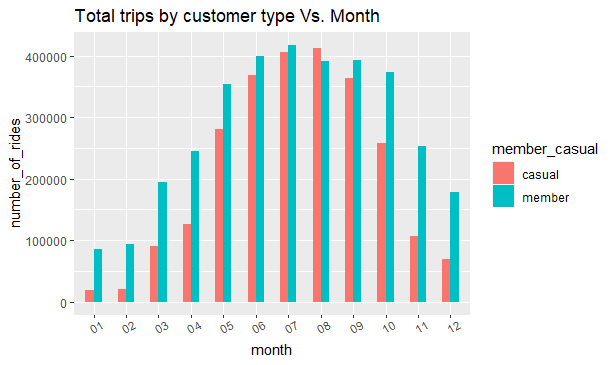

In [ ]:
trips21_22 %>%  #Total trips by customer type Vs. Month
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total trips by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))


Above, you can see the data visualization and code used to find the total trips by customer type vs month. We can see that in there are more member riders than casual riders. The data peaks around spring and summer and the great Chicago weather is definetly why

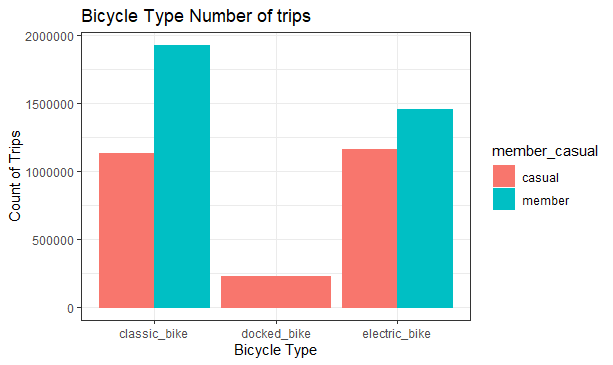

In [ ]:
trips21_22 %>% #bicycle type number of rides
  +     group_by(rideable_type, member_casual) %>%
  +     dplyr::summarize(count_trips = n()) %>%  
  +     ggplot(aes(x= rideable_type, y=count_trips, fill=member_casual, color=member_casual)) +
  +     geom_bar(stat='identity', position = 'dodge') +
  +     theme_bw()+
  +     labs(title ="Bicycle Type Number of trips", x = "Bicycle Type", y = "Count of Trips")
#`summarise()` has grouped output by 'rideable_type'. You can override using the`.groups` argument.


Here we can clearly see that there are more members than casual riders. Also, the classic bike is the most used bike.

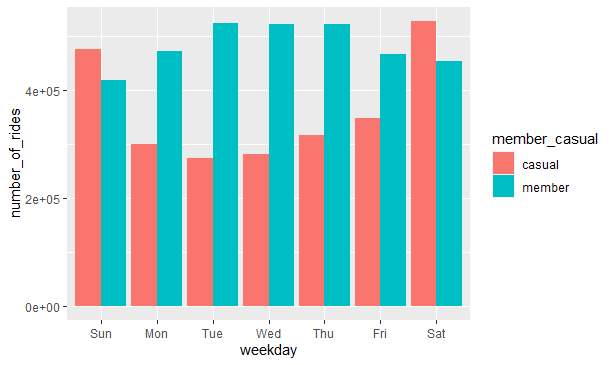

In [ ]:
trips21_22 %>% #number of rides by rider type
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

Here, we can observe the total number of rides classified per week. Casuals are more active during the weekend which is quite reasonable while members tend to peak Tuesday, Wednesday and Thursday

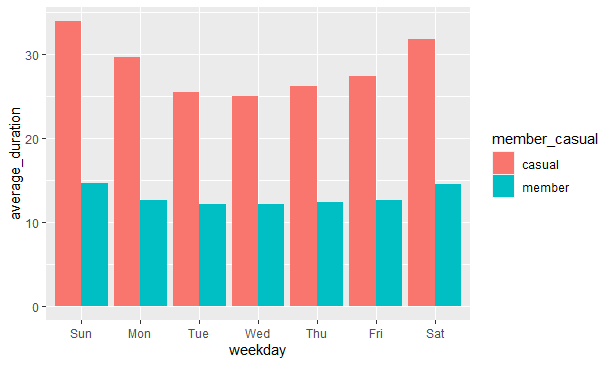

In [ ]:
trips21_22 %>% #average duration by member on weekday
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

It is interesting to see here that the average trip duration of casual riders are completely off the charts if we compare it to members only. Casuals surpass members everyday. So it is clear that casuals do enjoy the product. Now let's compare it on a monthly basis.

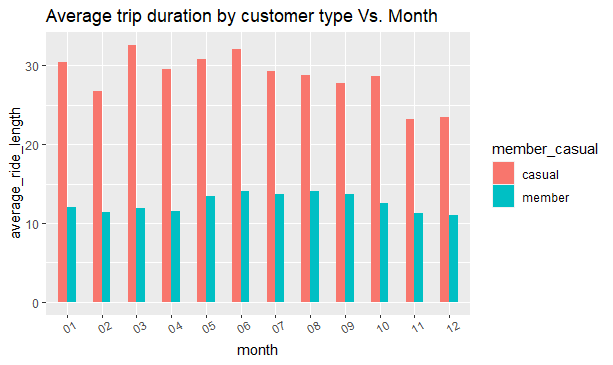

In [ ]:
trips21_22 %>%  #Average trip duration by customer type Vs. Month
  group_by(member_casual, month) %>% 
  summarise(average_ride_length = mean(ride_length)) %>%
  ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30))

The same could be said here. Casuals are indeed the main consumers throughout the year even though we have more member riders

**Further analysis and remarks**

Now, I want to demonstrate the Top 10 Start stations and codes used for both casual and member riders respectively

In [ ]:
# A tibble: 30 × 3
# Groups:   member_casual [1]
   member_casual start_station_name                 number_of_ride
   <chr>         <chr>                                       <int>
 1 casual        Streeter Dr & Grand Ave                     62983
 2 casual        DuSable Lake Shore Dr & Monroe St           33183
 3 casual        Millennium Park                             29219
 4 casual        Michigan Ave & Oak St                       28210
 5 casual        DuSable Lake Shore Dr & North Blvd          27312
 6 casual        Shedd Aquarium                              21709
 7 casual        Theater on the Lake                         20599
 8 casual        Wells St & Concord Ln                       18949
 9 casual        Wells St & Elm St                           15427
10 casual        Clark St & Lincoln Ave                      15388

In [ ]:
trips21_22 %>% #Top 10 Start stations for Casual Riders
  group_by(member_casual,start_station_name) %>%
  dplyr::summarise(number_of_ride = n()) %>%
  filter(start_station_name != "", "casual"== member_casual) %>%
  arrange(-number_of_ride) %>%
  head(n=30) %>%
  select(-member_casual)

In [ ]:
# A tibble: 30 × 3
# Groups:   member_casual [1]
   member_casual start_station_name       numbe…¹
   <chr>         <chr>                      <int>
 1 member        Kingsbury St & Kinzie St   26428
 2 member        Clark St & Elm St          23548
 3 member        Wells St & Concord Ln      23498
 4 member        Wells St & Elm St          20787
 5 member        Ellis Ave & 60th St        20437
 6 member        University Ave & 57th St   19817
 7 member        Clinton St & Madison St    19573
 8 member        Clinton St & Washington…   19422
 9 member        Dearborn St & Erie St      18616
10 member        Wells St & Huron St        18615

In [ ]:
trips21_22 %>% #Top 10 Start stations for Member Riders
  group_by(member_casual,start_station_name) %>%
  dplyr::summarise(number_of_ride = n()) %>%
  filter(start_station_name != "", "member" == member_casual) %>%
  arrange(-number_of_ride) %>%
  head(n=30) %>%
  select(-member_casual)

As we can see, the most favorite start station for casuals is Streeter Dr & Grand Ave while for member riders it is Kingsbury St & Kinzie St.

Furthermore, I want to demonstrate the Top 10 end stations and codes used for both casual and member riders respectively

In [ ]:
# A tibble: 30 × 3
# Groups:   member_casual [1]
   member_casual end_station_name                   number_of_ride
   <chr>         <chr>                                       <int>
 1 casual        Streeter Dr & Grand Ave                     64884
 2 casual        DuSable Lake Shore Dr & North Blvd          31022
 3 casual        DuSable Lake Shore Dr & Monroe St           30742
 4 casual        Millennium Park                             30150
 5 casual        Michigan Ave & Oak St                       29576
 6 casual        Theater on the Lake                         21648
 7 casual        Shedd Aquarium                              20515
 8 casual        Wells St & Concord Ln                       18157
 9 casual        Clark St & Lincoln Ave                      15423
10 casual        Clark St & Armitage Ave                     15379

In [ ]:
trips21_22 %>% #Top 10 End stations for Casual Riders
  group_by(member_casual,end_station_name) %>%
  dplyr::summarise(number_of_ride = n()) %>%
  filter(end_station_name != "", "casual"== member_casual) %>%
  arrange(-number_of_ride) %>%
  head(n=30) %>%
  select(-member_casual)

In [ ]:
# A tibble: 30 × 3
# Groups:   member_casual [1]
   member_casual end_station_name             number_of_ride
   <chr>         <chr>                                 <int>
 1 member        Kingsbury St & Kinzie St              26119
 2 member        Wells St & Concord Ln                 24193
 3 member        Clark St & Elm St                     23889
 4 member        Wells St & Elm St                     20813
 5 member        University Ave & 57th St              20531
 6 member        Clinton St & Washington Blvd          20243
 7 member        Clinton St & Madison St               20136
 8 member        Ellis Ave & 60th St                   19934
 9 member        Broadway & Barry Ave                  18885
10 member        Dearborn St & Erie St                 18885


In [ ]:
trips21_22 %>% #Top 10 End stations for Member Riders
  group_by(member_casual,end_station_name) %>%
  dplyr::summarise(number_of_ride = n()) %>%
  filter(end_station_name != "", "member" == member_casual) %>%
  arrange(-number_of_ride) %>%
  head(n=30) %>%
  select(-member_casual)

# Limitations of our data

I believe that there exists a few grey areas to our data in question which are related to:

- Privacy: Because of the data restrictions that do not allow us to access customer financial information, we cannot identify our top customers and maybe offer more to them so that they can be willing to consume our products more. This also goes for customers who suddenly used the bikes and stopped or who are just getting started as we can send them discounts and incentives. 

- Age and Gender: At this moment, the data set does not reveal any demographics in terms of age or gender. This makes the situation a little bit more complicated as we have to generalize our public and offer prime service since we do not have any reference points.

- Pricing: The bike passes or plans were not mentioned which could have been effective in the use of our analysis. This would help us understand our customers spending habits and what price point could be optimal for more profits.

# **Observations and Recommendations**

Our main concern in the beginning was **how do annual members and casual riders use Cyclistic bikes differently and how can we morph our marketing strategy in order to convert casual riders into annual members?**

Well I have a few points to make on how these underlying issues could be solved:

- Firstly, casuals were revealed to be those who would use bikes more on average also what is interesting is that the number one starting station for casual riders was also the number one ending station. When you look at the numbers, Streeter Dr & Grand Ave station has almost double the numbers of the second station in the rankings in both starting and ending stations. My plan is offering some kind of membership discount at that station and carrying out extensive marketing because it is the place where you will attract the most customers either if they are leaving or coming back

- Additionally, it is clear that our product is loved as users are completely in sync with it. However our attraction is low. So we have to understand "What makes our customers not commit?" The simple reason is they do not have big to win in enrolling as a member. A customer will not commit if they feel that they are at loss. So some reasons could be related to the pricing of becoming a member, or the lack of benefits or just feeling "special" if they become a member

- Concerning the time frames, in overall we see most users are using the bikes during the spring. Also, most casual users are weekend users while members are mostly weekday users. To maximize both sides, you could offer weekday discounts, subscription discounts and lucky draws to attract casuals into enrolling. Also more convenient membership rates for warmer months and weekends will be ideal for everyone.

**Thank you for your time!**